In [1]:
from keras.models import model_from_json
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(128,kernel_size=(3,3),input_shape=(64,64,3), activation='relu'))


model.add(layers.Conv2D(256,kernel_size=(3,3), activation='relu'))


model.add(layers.Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.load_weights("normal_cnn.h5")

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [2]:
import cv2

face_classifier = cv2.CascadeClassifier(r"C:\Users\Sub\Anaconda3\envs\sub\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")

def face_detector(img, size = 0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    #detectMultiScale = input이미지에서 object 검출, 여기선 얼굴 검출로 초기화 했기 때문에 얼굴 검출함
    
    #찾은 얼굴이 없으면 그냥 사진 그대로 리턴.
    if faces is() :
        return img,[]
    for (x,y,w,h) in faces :
        cv2.rectangle(img,(x,y),(x+w, y+h), (0,255,0),1)
        roi = img[y:y+h, x:x+w]

        roi = cv2.resize(roi, dsize = (64,64), interpolation = cv2.INTER_AREA)

        roi = roi.astype('float')/255
        roi = roi.reshape((1,64,64,3))

        #img = 사진 안 얼굴 위에 사각형이 그려저 있는 사진
    #roi = 사각형 모양으로 잘라 진 사진
    return img, roi 

In [4]:
cap = cv2.VideoCapture(0)

while True:
    #frame읽기에 성공하면 ret에 true, 실패하면 false가 저장됨.
    #frame에는 읽어온 frame(이미지)가 저장
    ret, frame = cap.read()
    
    image, face = face_detector(frame)
    
    try:

        result = model.predict(face)

        #result[0][0]는 0에 가까울 수록 내 얼굴임
        #고로 confidence가 높을 수록 내 얼굴 ㅎ.,ㅎ
        
        confidence = format(100 * (1 - result[0][0]), '.3f')

        display_string = str(confidence) + "% similar with My face"
        cv2.putText(image, display_string, (100,120), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 100, 250),1)
        
        if float(confidence) > 0.8 :
            cv2.putText(image, "Lim Joongsub", (250,450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0),1)
            
        cv2.imshow('face',image)
        
    except:
        cv2.putText(image, "CAN NOT FIND FACE", (100,120), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0),1)
        cv2.imshow('face',image)
    
    #1은 enter
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()
       

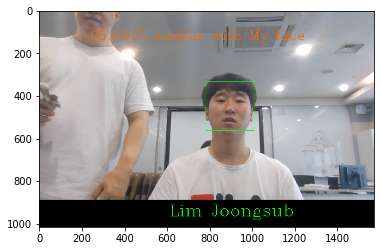

In [5]:
import matplotlib.pyplot as plt


img = cv2.imread('success_MyFace_Detecting.jpg', cv2.IMREAD_COLOR)
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

plt.imshow(img)
plt.show()

# Finish My face detection